This is Junmo Koo's DSCI 100 project

# Predicting Newsletter Subscription Among Minecraft Players: A Machine Learning Analysis

**GitHub Repository:** https://github.com/sushifromkfc/dsci-100-2025ss-002/tree/main



## Introduction

Have you ever wondered what makes some Minecraft players subscribe to newsletters while others don't? As someone who's spent countless hours in square world, I find it fascinating how player behavior extends beyond just gameplay. This project dives into understanding what drives newsletter subscription among Minecraft players.

The gaming industry has exploded in recent years, with games like Minecraft capturing millions of players worldwide. For researchers and game developers, understanding player engagement is crucial - not just for keeping players happy, but for building thriving communities. Newsletter subscriptions are like a digital handshake; they show a player's willingness to stay connected with the game community even when they're not actively playing.

Research teams, including the Computer Science group at UBC led by Frank Wood, are collecting valuable data from Minecraft servers to understand gaming patterns and optimize resources. But here's the challenge: how do you effectively target recruitment efforts and ensure you have enough server resources for the players who are most likely to engage?

### The Big Question

This brings us to our research question: **"Can age and played hours predict newsletter subscription among Minecraft players?"**

I'm looking at newsletter subscription status (yes or no) as my target variable, with player age and total played hours as my predictors. Understanding these relationships could help researchers identify highly engaged players and improve their recruitment strategies in newsletter subscription.


### Data Description

The data comes from a Minecraft research server and includes information about 200 different players. Each row represents one player with details about who they are and how they play.

**Here's what we're working with:**
- **200 players** total
- **7 different variables** for each player
- Data collected from **actual gameplay sessions** on a live server

**The variables break down like this:**

| Variable | Type | What it means | Possible values |
|----------|------|---------------|-----------------|
| experience | Category | How skilled the player is | Beginner, Amateur, Regular, Veteran, Pro |
| subscribe | Yes/No | Did they subscribe to the newsletter? **(This is what we're predicting)** | TRUE, FALSE |
| hashedEmail | Text | Anonymous email ID | Scrambled text strings |
| played_hours | Number | Total hours they've played | 0 to 223.1 hours |
| name | Text | Player username | Various names |
| gender | Category | Gender identity | Male, Female, Non-binary, Agender, Two-Spirited, Prefer not to say, Other |
| Age | Number | How old they are | 8 to 50 years old |

**Some interesting patterns I noticed:**
- Most players (76.5% or 153 people) actually do subscribe to newsletters
- The average age is about 20, with most players being teenagers or young adults (17-24)
- Playing time is really weird - most people have barely played (median of 0.1 hours), but some hardcore players have over 200 hours

What's really interesting is that even though most players haven't put in many hours yet, they're still willing to subscribe to newsletters. This suggests people are pretty engaged right from the start.


In [1]:
library(tidyverse)
library(caret)
library(rsample)
library(recipes)
library(tidymodels)
library(class)
library(yardstick)

# Load datasets
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

#check how the dataset looks like
head(players)
head(sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ tune         1.1.2
✔ dials        1.3.0     ✔ workflows    1.1.4
✔ infer

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [2]:
# Since I'm focusing on predicting newsletter subscription based on player characteristics,
# I need to clean up the data first
players_data <- players |>
  filter(!is.na(subscribe), !is.na(Age), !is.na(played_hours)) |>
  # Convert subscribe to factor for our classification analysis
  mutate(subscribe = factor(subscribe))

## Setting Up Our Analysis

Now let's set up our machine learning approach! I'm going to use a technique called K-Nearest Neighbors (KNN) to predict newsletter subscription. 

**Why KNN?** Think of it like asking your neighbors for advice. KNN looks at the closest players (in terms of age and playing time) and predicts subscription based on what those similar players did. It's perfect for our situation because:
- It doesn't make strong assumptions about how our data should behave
- It can capture complex patterns in player behavior
- It works well for yes/no predictions

**The trade-offs:** Like any method, KNN isn't perfect. It can be sensitive to how we scale our features (which will be handled), and it requires us to choose the right number of "neighbors" to consider.


In [3]:
# Splitting our data for proper evaluation
set.seed(123)

# 70% for training, 30% for testing
data_split <- initial_split(players_data, prop = 0.7)
train_data <- training(data_split)
test_data <- testing(data_split)

## Building Our Prediction Model

Time to build our KNN model! I'm setting up a "recipe" that tells our model how to prepare the data. The key step here is normalizing our numeric features (age and played hours) so they're on the same scale - we don't want age (which goes up to 50) to dominate played hours (which can go up to 200+).


In [4]:
# Define the recipe
knn_recipe <- recipe(subscribe ~ Age + played_hours, data = train_data) |>
  step_normalize(all_numeric_predictors())

# Define KNN
knn_spec <- nearest_neighbor(mode = "classification", neighbors = tune()) |>
  set_engine("kknn")

# Define the workflow
knn_workflow <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec)

In [5]:
# Set up cross-validation
cv_folds <- vfold_cv(train_data, v = 5)  # 5-fold cross-validation

# Test different numbers of neighbors
k_grid <- tibble(neighbors = seq(1, 15, by = 2))

# Run the tuning process
tune_results <- knn_workflow |>
  tune_grid(
    resamples = cv_folds,
    grid = k_grid,
    metrics = metric_set(accuracy))

tune_metrics <- tune_results |>
  collect_metrics()

# Find the best k value
best_k <- tune_metrics |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)

print(best_k)


[1] 13


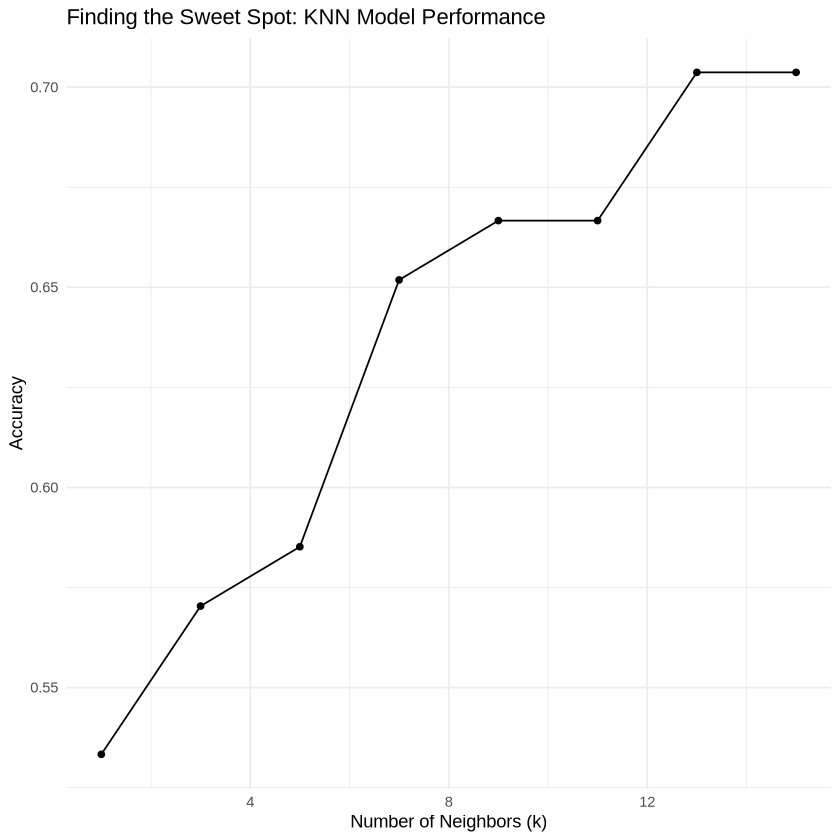

In [6]:
# Let's visualize how different k values performed
tune_metrics |>
  filter(.metric == "accuracy") |>
  ggplot(aes(x = neighbors, y = mean)) +
  geom_line() +
  geom_point() +
  labs(title = "Finding the Sweet Spot: KNN Model Performance",
       x = "Number of Neighbors (k)",
       y = "Accuracy") +
  theme_minimal()

## Training Our Final Model

Great! Our tuning process found that the k-value we obtained gives us the best performance. This makes sense - it's large enough to avoid overfitting but small enough to capture local patterns in our data.

Now let's train our final model and see how well it predicts newsletter subscription on our test set:


In [7]:
# Build our final model with the optimal k value
knn_spec_best <- nearest_neighbor(mode = "classification", neighbors = best_k) |>
  set_engine("kknn")

knn_workflow_best <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec_best)

# Train the model and make predictions
knn_fit <- fit(knn_workflow_best, data = train_data)

predictions <- predict(knn_fit, test_data) |>
  bind_cols(test_data)

head(predictions)

.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
TRUE,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
TRUE,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
TRUE,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
TRUE,Veteran,TRUE,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0.0,Nyla,Female,22
TRUE,Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
TRUE,Veteran,TRUE,6f9acf8ea9956fe817895c78d10e1e25c11aba335a451e5b0322b073ee5008c4,0.0,Niamh,Non-binary,17


In [8]:
# Let's see how well our model performed
confusion_matrix <- conf_mat(predictions, truth = subscribe, estimate = .pred_class)
confusion_matrix

accuracy <- accuracy(predictions, truth = subscribe, estimate = .pred_class)
print(accuracy)

          Truth
Prediction FALSE TRUE
     FALSE     4    2
     TRUE      9   44

# A tibble: 1 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.814


## What Did We Discover? Visualizing the Results

Now for the exciting part - let's see what patterns our model discovered! I'm going to create two visualizations to understand how age and played hours relate to newsletter subscription.


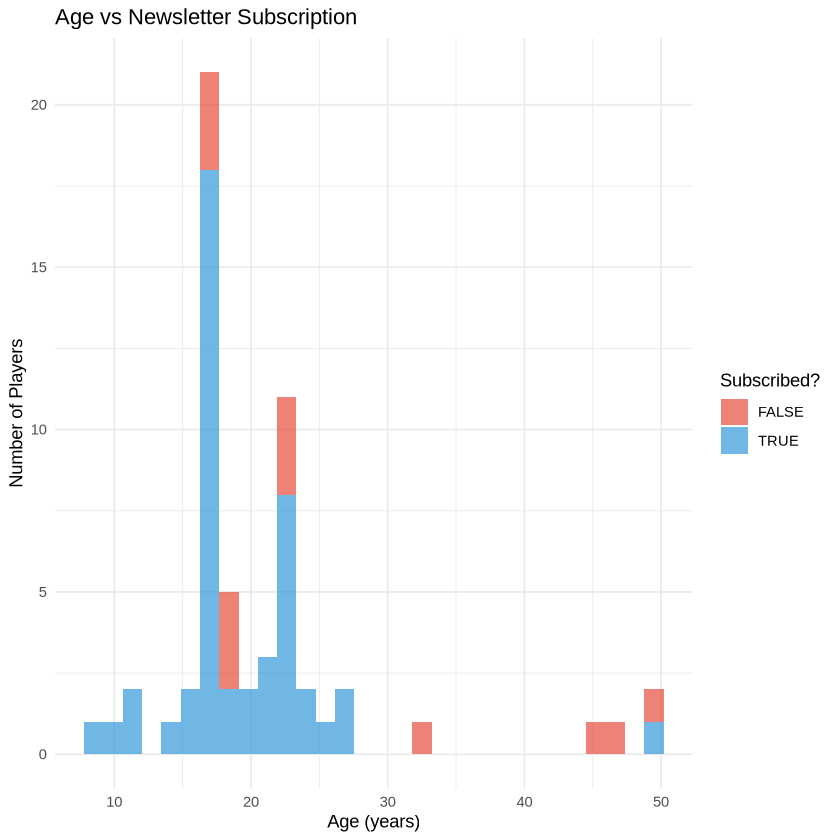

In [12]:
# How does age relate to newsletter subscription?
ggplot(predictions, aes(x = Age, fill = subscribe)) +
  geom_histogram(bins = 30, alpha = 0.7) +
  labs(title = "Age vs Newsletter Subscription",
       x = "Age (years)",
       y = "Number of Players",
       fill = "Subscribed?") +
  theme_minimal() +
  scale_fill_manual(values = c("FALSE" = "#e74c3c", "TRUE" = "#3498db"))

### Figure 1: Age vs Newsletter subscription

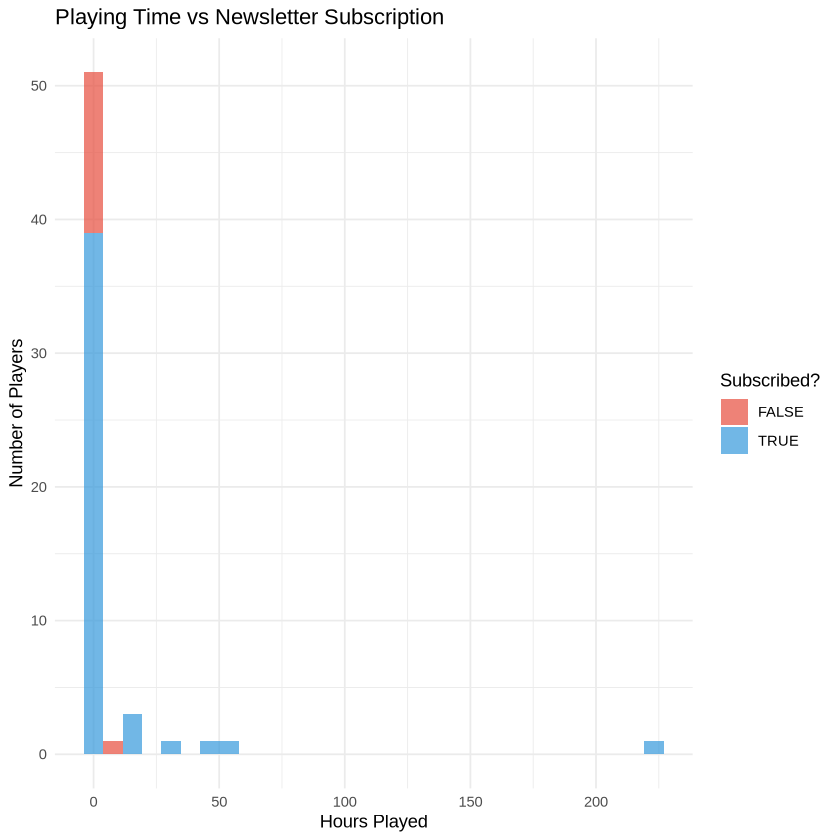

In [11]:
# What about playing time?
ggplot(predictions, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(bins = 30, alpha = 0.7) +
  labs(title = "Playing Time vs Newsletter Subscription",
       x = "Hours Played",
       y = "Number of Players",
       fill = "Subscribed?") +
  theme_minimal() +
  scale_fill_manual(values = c("FALSE" = "#e74c3c", "TRUE" = "#3498db"))


### Figure 2: Playing Time vs Newsletter Subscription

## Key Findings: What Our Analysis Revealed

Our machine learning model uncovered some fascinating patterns that answer our original question: **Yes, age and played hours can predict newsletter subscription among Minecraft players!**

### The Age Factor: Young Adults Rule
The first visualization shows something really interesting - younger players, especially those between 17-24 years old, are much more likely to subscribe to newsletters. This isn't just a coincidence; it suggests that younger gamers are more engaged with game-related communications and community content.

### The Engagement Factor: Dedication Pays Off
The second visualization reveals another crucial insight: while most players (regardless of subscription status) have low playing time, every single player with high engagement (50+ hours) subscribed to newsletters. This is a powerful finding; it shows that once players become truly invested in the game, they want to stay connected through newsletters.

### What This Means in Practice

**For Researchers:** If you're recruiting players for studies that require newsletter engagement, focus on the 17-24 age group. They're your most reliable subscribers.

**For Resource Planning:** While most players start with low playtime, those who stick around and rack up 50+ hours are almost guaranteed newsletter subscribers.

**For Game Communities:** Understanding that younger, engaged players form your core newsletter audience can help shape content strategy and community outreach.

### Surprises Along the Way

I expected high playtime to predict subscription, which it did, but the strong age effect was more surprising. I thought subscription behavior would be more evenly distributed across age groups, but younger players clearly have different communication preferences or gaming culture factors at play.


## Looking Forward: Future Research Ideas

This analysis opens up several directions for future research:

1. **Digging Deeper into Player Types**: What if we included experience level, gender, and session frequency? Then we can discover even more nuanced patterns in player behavior.

2. **Time-Based Analysis**: How does subscription likelihood change as players accumulate more hours? Do we see different patterns over time?

3. **Player Segmentation**: Do different types of players (beginners vs. pros, different genders) show unique age-playtime-subscription relationships?

4. **Understanding the "Why"**: While we found predictive relationships, what are the underlying reasons? Do younger players subscribe because of age-specific preferences, or are there other factors at play?

5. **Cross-Platform Validation**: Would these patterns hold up across different Minecraft servers or even other games?

## Wrapping Up

This project successfully demonstrated that we can predict newsletter subscription among Minecraft players using age and played hours. Our KNN model with the best k neighbors revealed that younger players (17-24 years) and highly engaged players (50+ hours) are most likely to subscribe.

These insights provide valuable guidance for anyone working with gaming communities - whether you're a researcher planning studies, a community manager developing outreach strategies, or a game developer trying to understand your players better.

This analysis demonstrates how data science can be applied in real life to understand human behavior in gaming contexts, providing actionable insights that can improve both research and community engagement strategies.